In [1]:
import base64
import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Functions

In [2]:
def decode_base64(item):
    return base64.b64decode(item.encode()).decode('utf-8')

In [3]:
def decode_human_ai_hash(df):
    df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])
    df = df.applymap(lambda x: x.replace('\xa0', '').strip() if isinstance(x, str) else x)
    nan_summary = df.isnull().sum()
    print("Number of NaN values in each column:\n", nan_summary)
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            majority_value = df[column].mode()[0]
            df[column].fillna(majority_value, inplace = True)
    return df

In [4]:
participants = ['p1', 'p2', 'p3', 'p4']

human_assessed_requirements = [pd.read_excel(f'./{i}_human_evaluation/task_d/task_d.xlsx') for i in participants]
human_assessed_requirements = [decode_human_ai_hash(df) for df in human_assessed_requirements]

Number of NaN values in each column:
 component                                                                                                0
zephyr_7b_beta_missing_requirments                                                                       0
This requirement is consistent with other project requirements.                                          0
This requirement accurately reflects the needs that were previously unstated, missing, or overlooked.    0
Including this requirement would lead to a more complete set of project specifications.                  0
dtype: int64
Number of NaN values in each column:
 component                                                                                                0
zephyr_7b_beta_missing_requirments                                                                       0
This requirement is consistent with other project requirements.                                          0
This requirement accurately reflects the needs that wer

/var/folders/sl/2p60p6g94jzf57rhnp2dng1h0000gn/T/ipykernel_56395/3822606932.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\xa0', '').strip() if isinstance(x, str) else x)
/var/folders/sl/2p60p6g94jzf57rhnp2dng1h0000gn/T/ipykernel_56395/3822606932.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\xa0', '').strip() if isinstance(x, str) else x)
/var/folders/sl/2p60p6g94jzf57rhnp2dng1h0000gn/T/ipykernel_56395/3822606932.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\xa0', '').strip() if isinstance(x, str) else x)
/var/folders/sl/2p60p6g94jzf57rhnp2dng1h0000gn/T/ipykernel_56395/3822606932.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\xa0', '').strip() if isinstance(x, s

In [5]:
likert_label2id = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

component_label2id = {
    'self-evaluation': 0,
    'adaptation functionality': 1,
    'chat-bot': 2
}

likert_id2label = {v: k for k, v in zip(likert_label2id.keys(), likert_label2id.values())}
component_id2label = {v: k for k, v in zip(component_label2id.keys(), component_label2id.values())}

In [6]:
human_assessed_requirements_concated = pd.concat(human_assessed_requirements, axis = 0)

compoenent = human_assessed_requirements_concated.columns[0]
consistency, refelect_needs_missing, lead_to_more_complet = human_assessed_requirements_concated.columns[2:]

In [7]:
# # mapping labels to id mapping

human_assessed_requirements_concated[compoenent] = human_assessed_requirements_concated[compoenent].map(component_label2id)
human_assessed_requirements_concated[consistency] = human_assessed_requirements_concated[consistency].map(likert_label2id)
human_assessed_requirements_concated[refelect_needs_missing] = human_assessed_requirements_concated[refelect_needs_missing].map(likert_label2id)
human_assessed_requirements_concated[lead_to_more_complet] = human_assessed_requirements_concated[lead_to_more_complet].map(likert_label2id)
human_assessed_requirements_concated.head(3)

,component,zephyr_7b_beta_missing_requirments,This requirement is consistent with other project requirements.,"This requirement accurately reflects the needs that were previously unstated, missing, or overlooked.",Including this requirement would lead to a more complete set of project specifications.
0,0,1 - The Learning Platform with the test model ...,1,1,2
1,0,2 -The exercise shall evaluate the answers pro...,4,2,2
2,0,3 - The Learning Platform with the test module...,2,2,2


# Descriptive Statistics (not shown on the paper)

In [8]:
# Ploting Likert percentage frequencies 
import plot_likert

def prepare_data_for_likert_precentage_scale_plot(df, likert_columns):
    
    consistency_quality = likert_columns[0]
    refelect_needs_missing_quality = likert_columns[1]
    lead_to_more_complet_quality = likert_columns[2]

    consistency = df[consistency_quality]
    refelect_needs_missing = df[refelect_needs_missing_quality]
    lead_to_more_complet = df[lead_to_more_complet_quality]

    reformated_ = {
        'Requirement Consistency': [likert_id2label[i] for i in consistency],
        'Missing Requirements Reflection': [likert_id2label[i] for i in refelect_needs_missing],
        'Requirements Set Completness': [likert_id2label[i] for i in lead_to_more_complet]
    }

    reformated_df_ = pd.DataFrame(reformated_)
    return reformated_df_

In [9]:
self_evaluation_df = prepare_data_for_likert_precentage_scale_plot(human_assessed_requirements_concated, 
                                                                   likert_columns = [consistency, refelect_needs_missing, lead_to_more_complet])

/Users/mohammadkasrahabib/miniforge3/envs/metal-engine/lib/python3.9/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/mohammadkasrahabib/miniforge3/envs/metal-engine/lib/python3.9/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


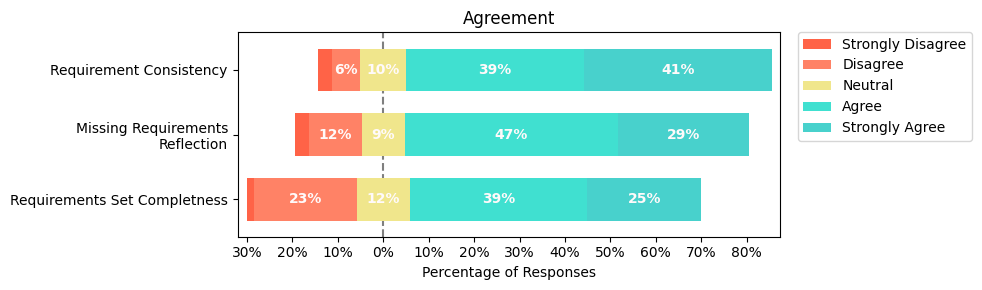

In [10]:
plot_likert.__internal__.BAR_LABEL_FORMAT = "%.0f"

# Setup some config for plot
scale = likert_label2id.keys()
my_color_scheme = [
    plot_likert.colors.TRANSPARENT,
    '#FF6347',  # Tomato (strong disagreement)
    '#FF8266',  # Lighter tomato
    '#F0E68C',  # Khaki (neutral color matching both)
    '#40E0D0',  # Turquoise
    '#48D1CC'   # Medium Turquoise (strong agreement)
]


fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 3))
ax.set_title("Agreement")
plot_likert.plot_likert(self_evaluation_df, scale, plot_percentage = True,
                        bar_labels = True, 
                        bar_labels_color = "snow", 
                        colors = my_color_scheme,
                        ax = ax,
                        legend = 0,
                        width = 0.65)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (1.23, .90))
plt.tight_layout()

plt.savefig('./raw_human_rating_plots_not/task_d_raw_ratings.png', dpi = 300)
plt.show()

# Inferential Statistics

## Why Wilcoxon Signed-Rank Test Selected?

The one-sample Wilcoxon signed-rank test is recommended over the one-sample t-test and the sign test for your Likert data, given its strengths in handling non-normal, ordinal data. Usman et al. note that while the t-test is powerful under normal distributions, it is less suitable when normality is in doubt, which can often be the case with Likert data [1]. The Wilcoxon test is preferred over the sign test as it accounts for both the direction and magnitude of differences, offering greater sensitivity and power, as highlighted by Divine et al. [2]. Arnold’s findings further indicate that, compared to the t-test, the Wilcoxon test maintains higher power for non-normal distributions, making it a robust choice for ordinal data [3]. Lastly, Randles emphasizes the Wilcoxon test’s efficiency compared to the t-test when data deviate from normality, underscoring its suitability for ordinal Likert scales [4].

## References
[1] Usman, M. "Power Efficiency of Sign Test and Wilcoxon Signed Rank Test Relative to T-Test", Mathematical Theory and Modeling, 2015.<br>
[2] Divine, G. et al. "A Review of Analysis and Sample Size Calculation Considerations for Wilcoxon Tests", Anesthesia & Analgesia, 2013.<br>
[3] Arnold, H. J. "Small Sample Power of the One Sample Wilcoxon Test for Non-Normal Shift Alternatives", The Annals of Mathematical Statistics, 1965.<br>
[4] Randles, R. H. "Wilcoxon Signed Rank Test", Encyclopedia of Statistical Sciences, 2006.

In [11]:
# Rank Biserial effect size
import stikpetP as ps

def rank_biserial(data, hypMed):
    data = pd.Series(data)
    return ps.r_rank_biserial_os(data, mu = hypMed)['rb'][0]

In [12]:
# Wilcoxon Test and Bootstrap CI
from scipy.stats import wilcoxon
from scipy.stats import bootstrap


def wilcoxon_rank_test(x, hypMed = 3, ci = 0.95):
    x_median = x.median()
    x_mean = x.mean()
    sample_size = len(x)
    print('Sample_ ', sample_size)
    differences = np.array(x) - hypMed
    test_statistic, p_value = wilcoxon(differences, alternative = "greater", zero_method = 'zsplit') # less -> left-tailed, use zero_method pratt, zsplit, wilcox
    
    print(f"p_value: {p_value:.5f}")
    print("Wilcoxon statistic:", test_statistic)

    print(f'\nMedian of the responses {x_median}')
    print(f'Mean of the responses {x_mean}')
    
    std_dev = np.std(x, ddof=1)
    print(f'Standard Deviation {std_dev}')
    
    rbc = rank_biserial(x, hypMed)
    print(f"\neffect_size_rbc: {rbc:.5f}")

    resampled_medians = bootstrap((x,), lambda data: rank_biserial(data, hypMed), confidence_level = ci, n_resamples = 1000, method = 'basic', random_state = 42)
    ci_lower, ci_upper = resampled_medians.confidence_interval
    print(f"\n{int(ci * 100)}% Median CI: ({ci_lower:.5f}, {ci_upper:.5f})")
    return p_value

## **Variable Name:** Consistent with Requirements Set$_{(CRS)}$
**Variable Description:** This requirement is consistent with other project requirements.

### **Hypotheses:**

- $H_{0,7}$: The median rating ($M$) for the Consistent with Requirements Set$_{(CRS)}$ is  $\leq 3$.

- **$H_{a,7}$:** The median rating for Consistent with Requirements Set$_{(CRS)}$ is $> 3$.

---

## **Report:**
The results indicate support for the alternative hypothesis with $W = 7470.5$ and $p < 001$. The observed median rating was greater than the hypothesized median $Median = 3.0$. 

In [13]:
consistent = human_assessed_requirements_concated.loc[:, 'This requirement is consistent with other project requirements.']
p_value_1 = wilcoxon_rank_test(consistent)

Sample_  128
p_value: 0.00000
Wilcoxon statistic: 7470.5

Median of the responses 4.0
Mean of the responses 4.09375
Standard Deviation 1.0228684385196782

effect_size_rbc: 0.82489

95% Median CI: (0.72938, 0.94663)


## **Variable Name:** Identify Missing Requirements$_{(IMR)}$
**Variable Description:** This requirement accurately reflects the needs that were previously unstated, missing, or overlooked


### **Hypotheses:**

- **$H_{0,8}$:** The median rating ($M$) for the Identify Missing Requirements$_{(IMR)}$ is $\leq 3$.

- **$H_{a,8}$:** The median rating for Identify Missing Requirements$_{(IMR)}$ is $> 3$.
---

## **Report:**
The results indicate support for the alternative hypothesis with $W = 7035.0$ and $p < 001$. The observed median rating was greater than the hypothesized median $Median = 3.0$. 

In [14]:
missing = human_assessed_requirements_concated.loc[:, 'This requirement accurately reflects the needs that were previously unstated, missing, or overlooked.']
p_value_2 = wilcoxon_rank_test(missing)

Sample_  128
p_value: 0.00000
Wilcoxon statistic: 7035.0

Median of the responses 4.0
Mean of the responses 3.8671875
Standard Deviation 1.0601670775323409

effect_size_rbc: 0.71883

95% Median CI: (0.58909, 0.85699)


## **Variable Name:** Enhancing the Overall Completeness$_{(EOC)}$
**Variable Description:** Including this requirement would lead to a more complete set of project specifications.


- **$H_{0,9}$:** The median rating ($M$) for the Enhancing the Overall Completeness$_{(EOC)}$ is $\leq 3$.

- **$H_{a,9}$:** The median rating for Enhancing the Overall Completeness$_{(EOC)}$ is $> 3$

---

## **Report:**
The results indicate support for the alternative hypothesis with $W = 6378.0$ and $p < 001$. The observed median rating was greater than the hypothesized median $Median = 3.0$. 

In [15]:
complete = human_assessed_requirements_concated.loc[:, 'Including this requirement would lead to a more complete set of project specifications.']
p_value_3 = wilcoxon_rank_test(complete)

Sample_  128
p_value: 0.00000
Wilcoxon statistic: 6378.0

Median of the responses 4.0
Mean of the responses 3.6328125
Standard Deviation 1.1354772401911568

effect_size_rbc: 0.57988

95% Median CI: (0.44157, 0.74330)


# Multiple Testing

## **Report:** 
All the addjusted p-values using Holm-Bonferroni correction method is confirming the un-adjusted p-values.

In [16]:
from statsmodels.stats.multitest import multipletests

# Example list of p-values
pvals = [p_value_1, p_value_2, p_value_3]

# Perform Holm-Bonferroni correction
reject, pvals_corrected, _, _ = multipletests(pvals, alpha = 0.05, method = 'holm')

print("Original p-values:", [f"{i:.5f}" for i in pvals])
print("Adjusted p-values:", [f"{i:.5f}" for i in pvals_corrected])
print("Reject null hypothesis:", reject)

Original p-values: ['0.00000', '0.00000', '0.00000']
Adjusted p-values: ['0.00000', '0.00000', '0.00000']
Reject null hypothesis: [ True  True  True]
